# Nibabel Basics Notebook
### *Learning how to load and view MRI scans*

## Import Libraries
We need nibabel for MRI files and matplotlib for plotting.

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## Upload an MRI File (.nii.gz)
Upload any NIfTI file.

In [2]:
# from google.colab import files
# uploaded = files.upload()

#instead of colab done locally

file_path = "brain1.nii.gz"

## Load MRI File
Nibabel loads the 3D MRI volume as a NumPy array.

In [3]:
#file_path = list(uploaded.keys())[0]
mri = nib.load(file_path).get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (489, 734, 503)


## Visualize a Middle Slice
MRI is 3D. We view one slice at a time.

(np.float64(-0.5), np.float64(733.5), np.float64(488.5), np.float64(-0.5))

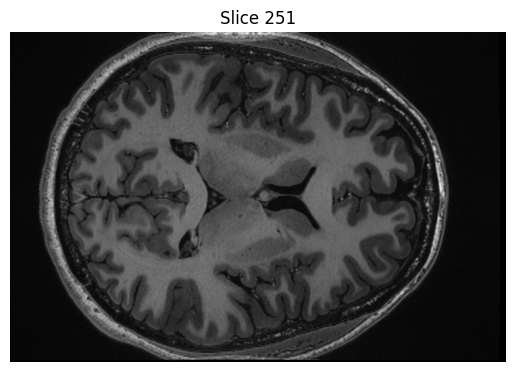

In [4]:
slice_index = mri.shape[2] // 2
plt.imshow(mri[:, :, slice_index], cmap='gray')
plt.title(f'Slice {slice_index}')
plt.axis('off')

## Extract All Slices
Convert 3D MRI into 2D slices.

In [5]:
slices = [mri[:, :, i] for i in range(mri.shape[2])]
len(slices)

503

## Normalize a Slice
Normalization improves contrast.

(np.float64(-0.5), np.float64(733.5), np.float64(488.5), np.float64(-0.5))

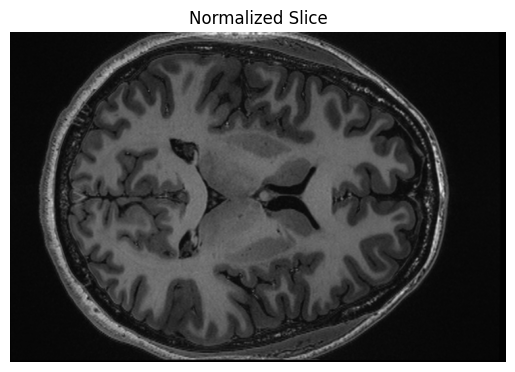

In [6]:
norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))
plt.imshow(norm_slice, cmap='gray')
plt.title('Normalized Slice')
plt.axis('off')

## Resize Slice (Used in ML Preprocessing)

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

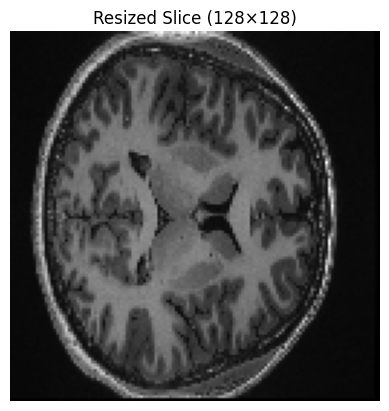

In [7]:
#import tensorflow as tf
#try cv2 instead, since I am running locally and tensorflow is bulky
import cv2 
resized = cv2.resize(norm_slice[..., None], (128, 128))
plt.imshow(resized.squeeze(), cmap='gray')
plt.title('Resized Slice (128×128)')
plt.axis('off')

## **Exercises**
1. Load **another** MRI file and visualize 5 slices.
2. Write a function `plot_slices(volume, indices)` to plot given slice numbers.
3. Create a function to normalize **all** slices and return the new array.


In [11]:
def plot_slices(volume, indices):
    if type(indices)==int:
        indices = list(indices)
    elif type(indices)!=list:
        raise TypeError
    fig, axes = plt.subplots(nrows=len(indices), ncols=1, figsize=(10,20))
    plt.tight_layout()
    for index in range(len(indices)):
        axes[index].imshow(volume[:,:,indices[index]], cmap='gray')

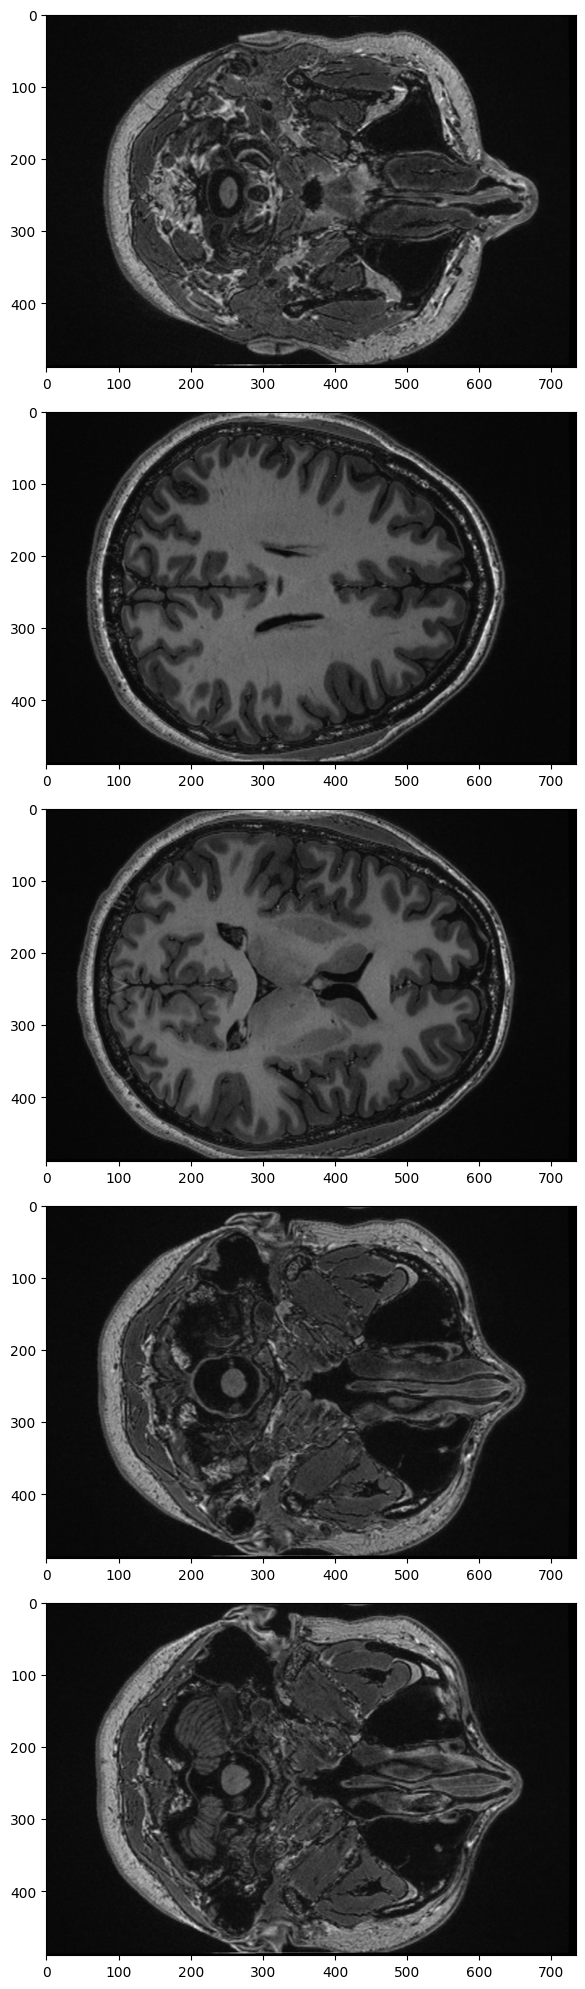

In [12]:
plot_slices(mri, [1,300,251,30,40])

In [22]:
def normalize_slice(volume):
    new_volume = np.empty_like(volume)
    minimum = np.min(volume)
    maximum = np.max(volume)
    for slice_index in range(volume.shape[2]):
        new_volume[:,:,slice_index] = (volume[:,:,slice_index] - minimum) / (maximum - minimum)

In [ ]:
normalize_slice(mri.astype(np.float16)) #float16 since others be too big and memory allocation couldn't happen